In [1]:
from pogo import Pogo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import  datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from urllib.request import urlopen
from urllib.parse import urlparse
import os.path

In [3]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

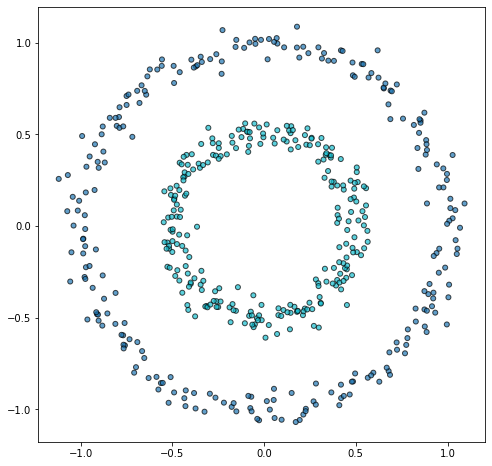

In [4]:
X=noisy_circles[0]
y=noisy_circles[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

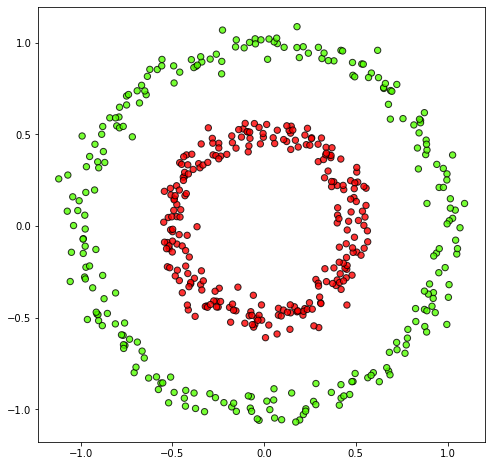

In [5]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [6]:
pogo.idx_

2389

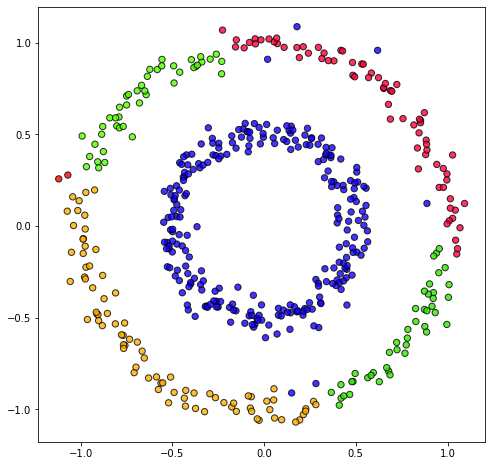

In [7]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [8]:
pogo.idx_

1717

In [9]:
pogo.candidates_[:10]

[2389, 1996, 1717, 794, 2320, 1933, 1824, 1254, 1297, 1335]

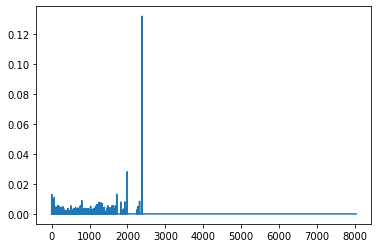

In [10]:
plt.plot(pogo.gap_vector_)

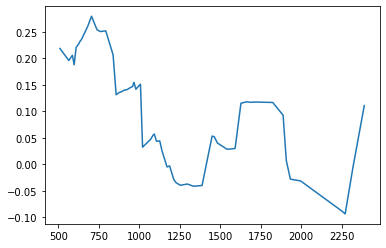

In [11]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


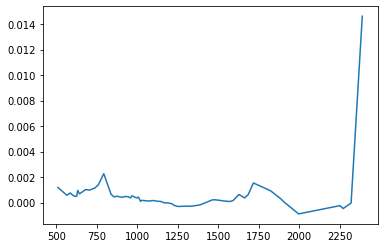

In [12]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [13]:
silhouette_indices[np.argmax(silhouette_gap)]

2389

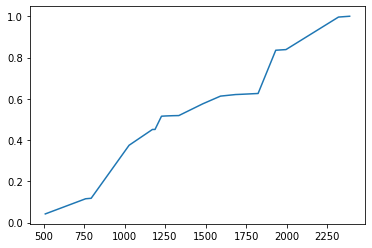

In [14]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [15]:
rand_indices[np.argmax(rand_array)]

2389

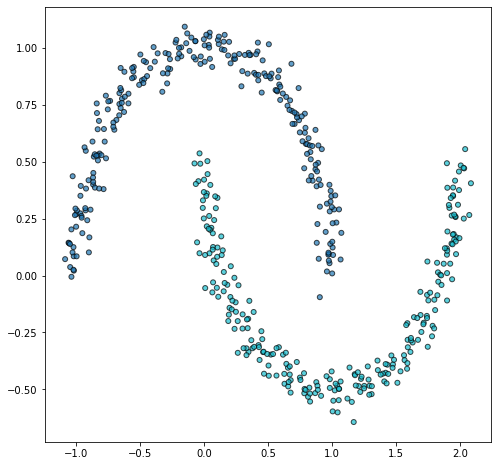

In [16]:
X=noisy_moons[0]
y=noisy_moons[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

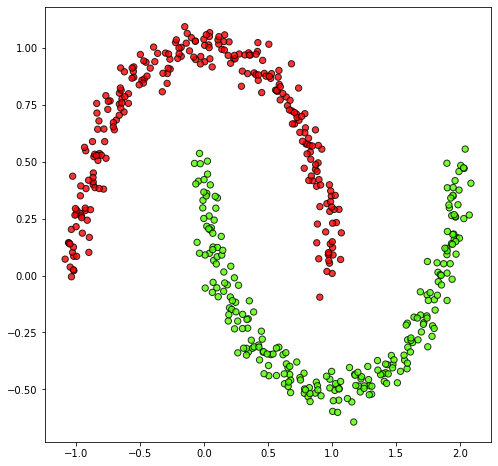

In [17]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

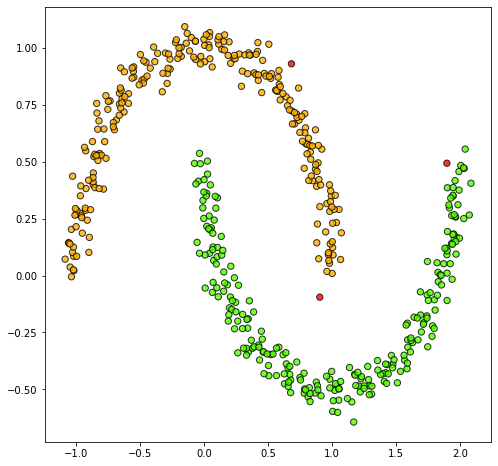

In [18]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [19]:
pogo.idx_

2107

In [20]:
pogo.candidates_[:10]

[3659, 2621, 2107, 1734, 1940, 1346, 2514, 1510, 1270, 1862]

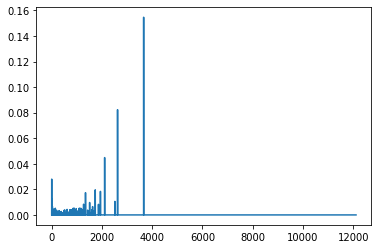

In [21]:
plt.plot(pogo.gap_vector_)

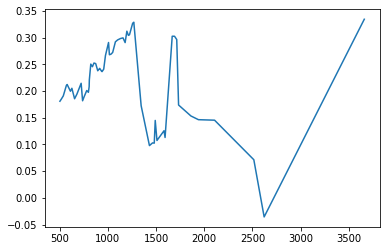

In [22]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)

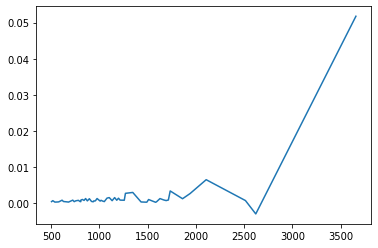

In [23]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [24]:
silhouette_indices[np.argmax(silhouette_gap)]

3659

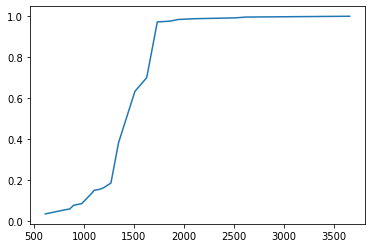

In [25]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [26]:
rand_indices[np.argmax(rand_array)]

3659

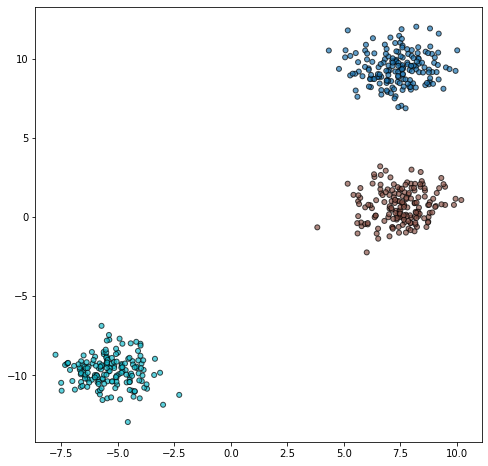

In [27]:
X=blobs[0]
y=blobs[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

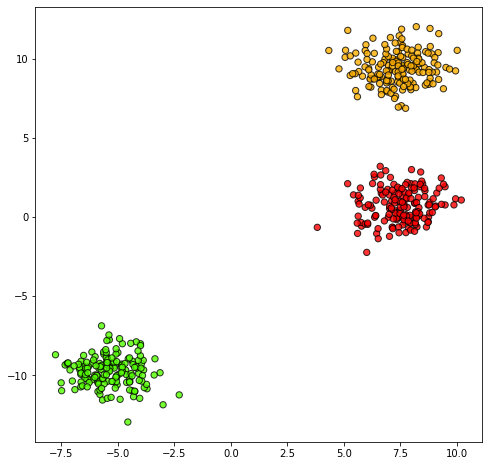

In [28]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [29]:
pogo.idx_

22008

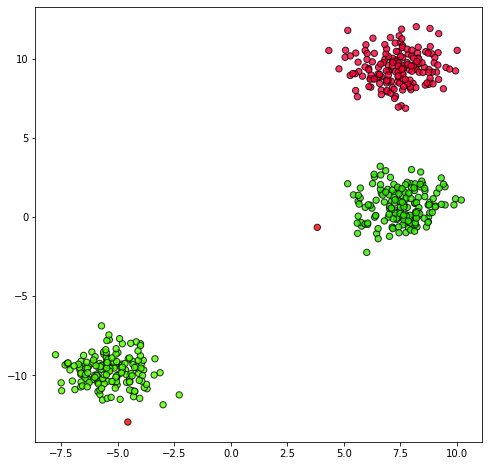

In [30]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [31]:
pogo.idx_

12286

In [32]:
pogo.candidates_[:10]

[22008, 40162, 16771, 12286, 8881, 5322, 10585, 6624, 4257, 7996]

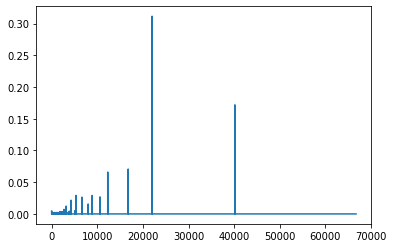

In [33]:
plt.plot(pogo.gap_vector_)

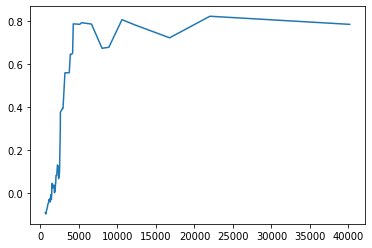

In [34]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)

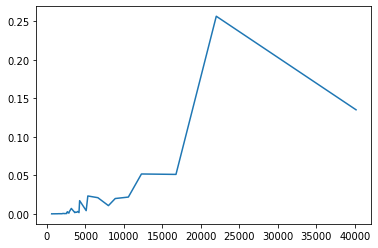

In [35]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [36]:
silhouette_indices[np.argmax(silhouette_gap)]

22008

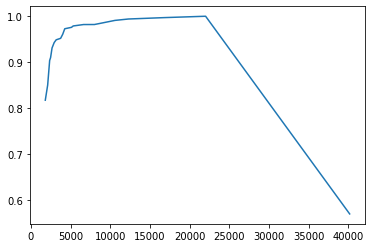

In [37]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [38]:
rand_indices[np.argmax(rand_array)]

22008

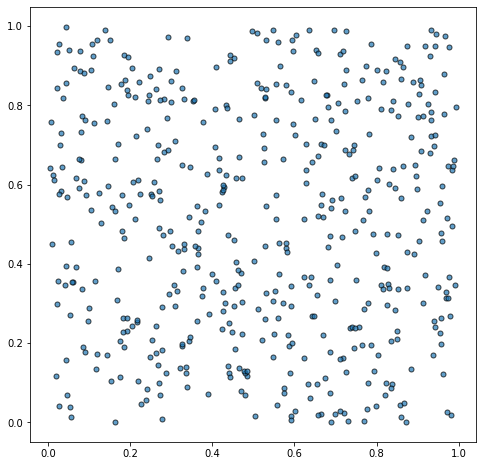

In [39]:
X=no_structure[0]
y=no_structure[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

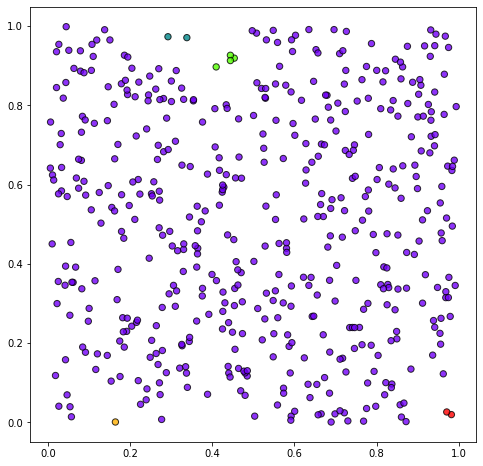

In [40]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

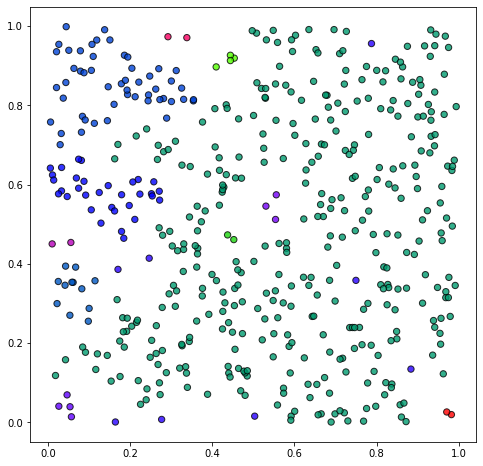

In [41]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [42]:
pogo.idx_

1114

In [43]:
pogo.candidates_[:10]

[1636, 1114, 1226, 1033, 575, 1516, 660, 507, 708, 678]

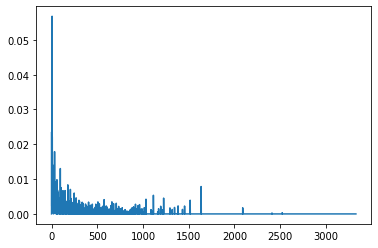

In [44]:
plt.plot(pogo.gap_vector_)

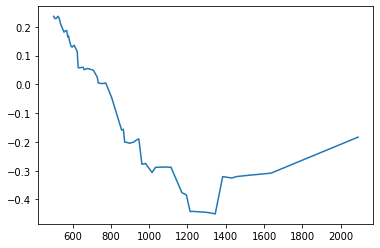

In [45]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


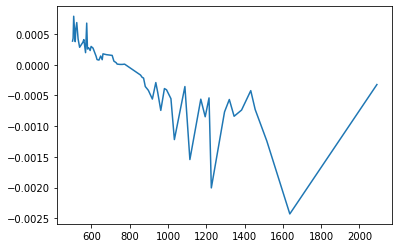

In [46]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [47]:
silhouette_indices[np.argmax(silhouette_gap)]

507

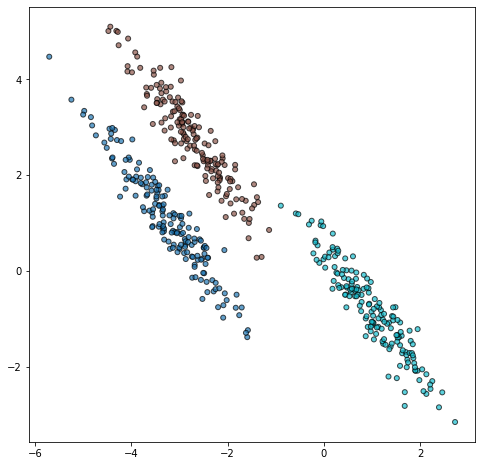

In [48]:
X=aniso[0]
y=aniso[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

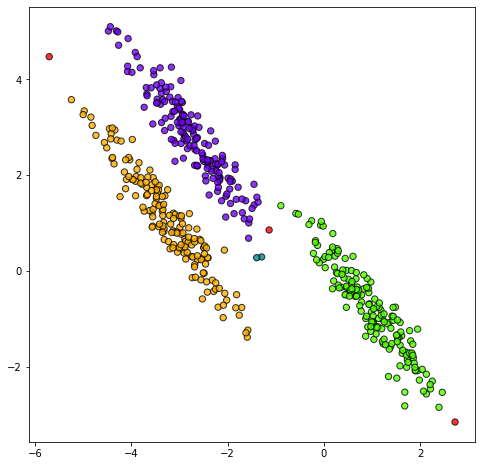

In [49]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [50]:
pogo.idx_

4803

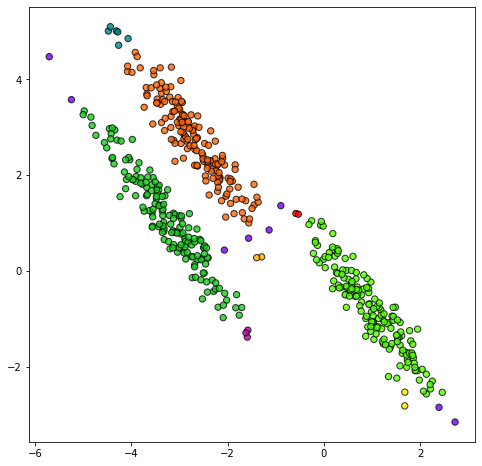

In [51]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [52]:
pogo.idx_

3035

In [53]:
pogo.candidates_[:10]

[4803, 8321, 1590, 3035, 7101, 4003, 2643, 6584, 2482, 3436]

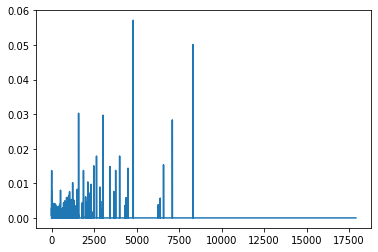

In [54]:
plt.plot(pogo.gap_vector_)

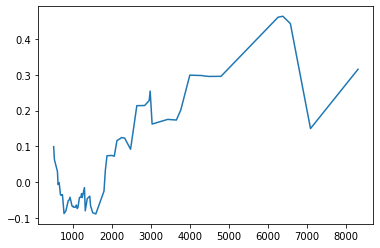

In [55]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


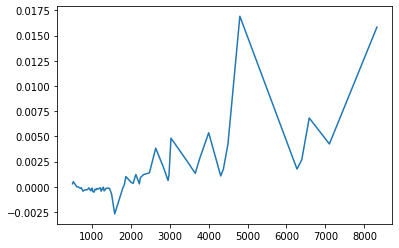

In [56]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [57]:
silhouette_indices[np.argmax(silhouette_gap)]

4803

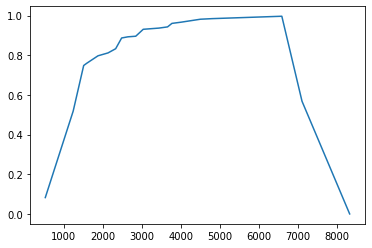

In [58]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [59]:
rand_indices[np.argmax(rand_array)]

6584

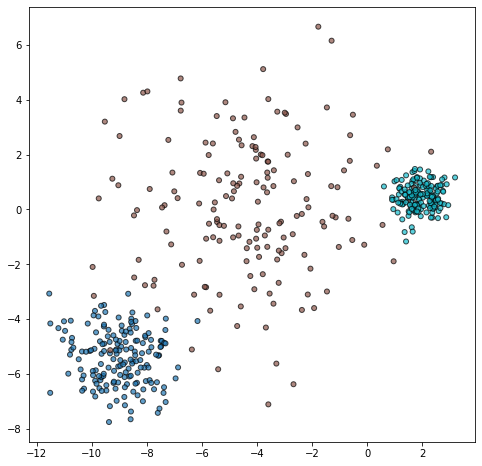

In [60]:
X=varied[0]
y=varied[1]

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

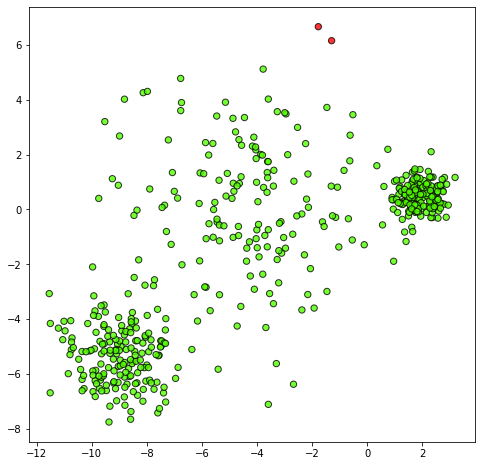

In [61]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

In [62]:
pogo.idx_

18297

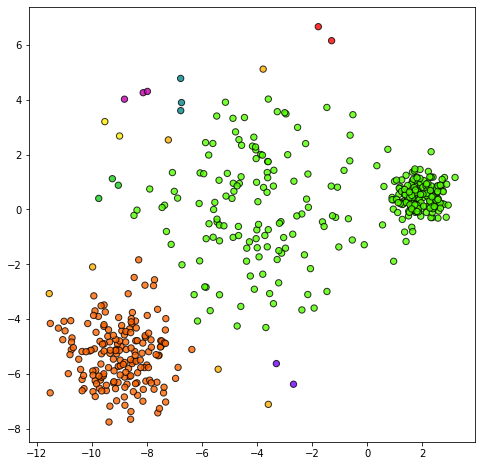

In [63]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [64]:
pogo.idx_

12260

In [65]:
pogo.candidates_[:10]

[18297, 12260, 15860, 4283, 5883, 3849, 8546, 5369, 17325, 2662]

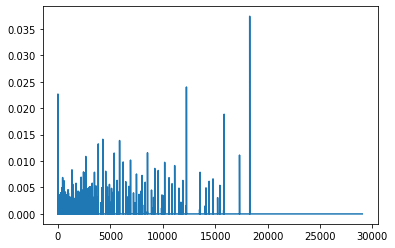

In [66]:
plt.plot(pogo.gap_vector_)

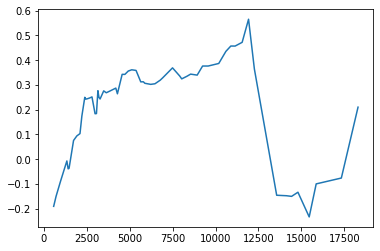

In [67]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


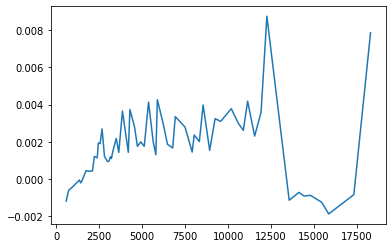

In [68]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [69]:
silhouette_indices[np.argmax(silhouette_gap)]

12260

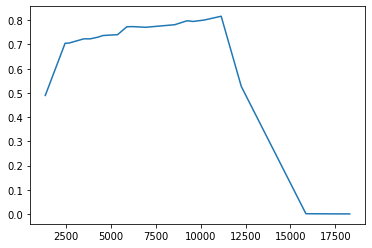

In [70]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [71]:
rand_indices[np.argmax(rand_array)]

11139

In [72]:
#DBSCAN Demo Data from scikitlearn
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
filename = 'dbscan-demo-data'

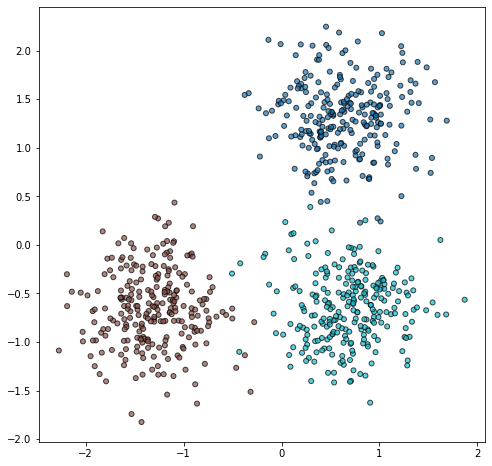

In [73]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

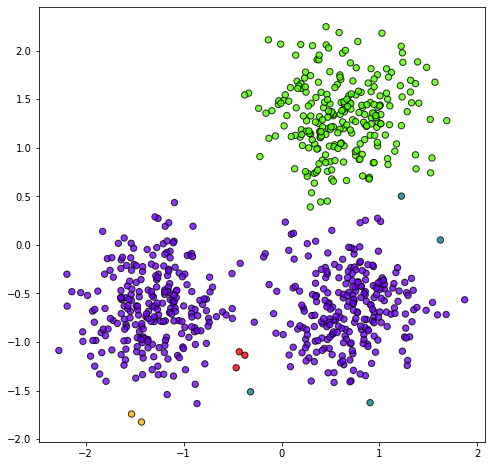

In [74]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

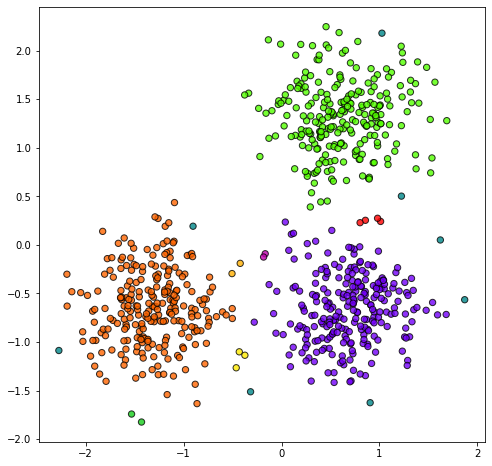

In [75]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [76]:
pogo.idx_

7424

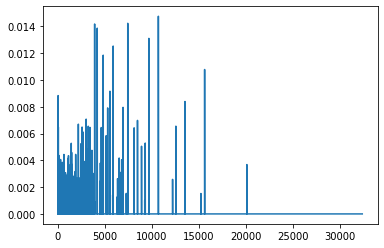

In [77]:
plt.plot(pogo.gap_vector_)

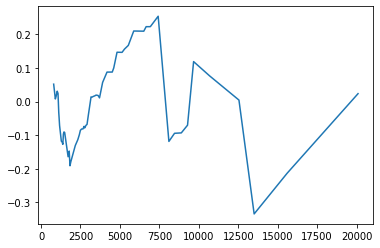

In [78]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(60)


In [79]:
silhouette_indices[np.argmax(silhouette_array)]

7424

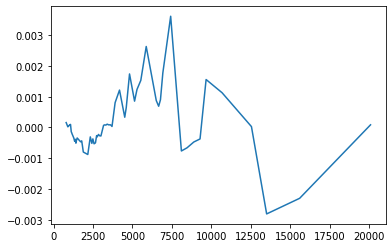

In [80]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [81]:
silhouette_indices[np.argmax(silhouette_gap)]

7424

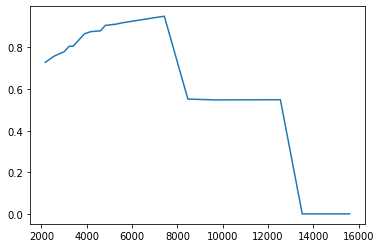

In [82]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [83]:
rand_indices[np.argmax(rand_array)]

7424

In [84]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [85]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename


In [86]:
X, y, filename = return_dataset('R15.txt')

https://cs.joensuu.fi/sipu/datasets/R15.txt
R15.txt
(600, 3)
[[ 9.802 10.132  1.   ]
 [10.35   9.768  1.   ]
 [10.098  9.988  1.   ]
 [ 9.73   9.91   1.   ]
 [ 9.754 10.43   1.   ]
 [ 9.836  9.902  1.   ]
 [10.238  9.866  1.   ]
 [ 9.53   9.862  1.   ]
 [10.154  9.82   1.   ]
 [ 9.336 10.456  1.   ]]
(600,)
(600, 2)


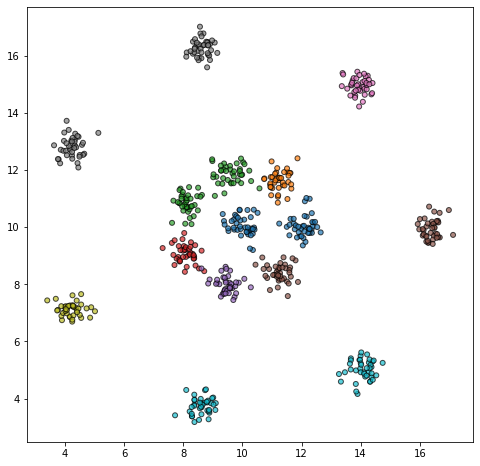

In [87]:

size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

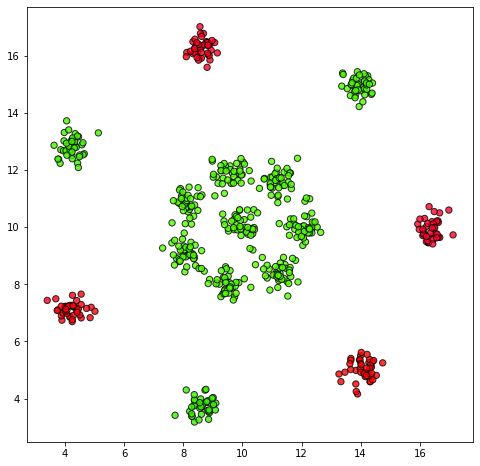

In [88]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

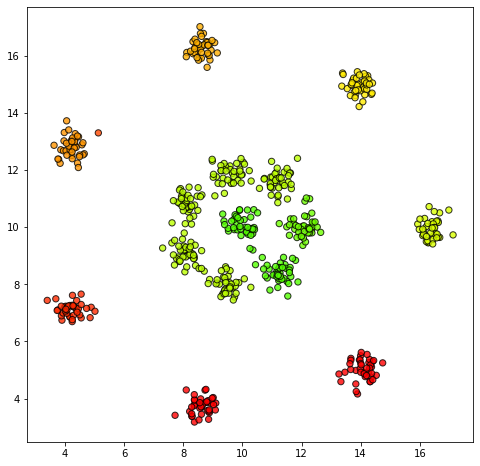

In [89]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()

In [90]:
pogo.candidates_[:11]

[7643, 6053, 3807, 4346, 7259, 5481, 6889, 3187, 5236, 4962, 5887]

In [91]:
pogo.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [92]:
def replace_groups(data):
    a,b,c, = np.unique(data, True, True)
    _, ret = np.unique(b[c], False, True)
    return ret

In [93]:
replace_groups(pogo.labels_)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [94]:
pogo.idx_

6053

In [95]:
pogo.initial_idx_

7643

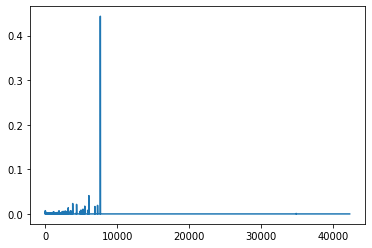

In [96]:
plt.plot(pogo.gap_vector_)

In [97]:
pogo.candidates_[2]

3807

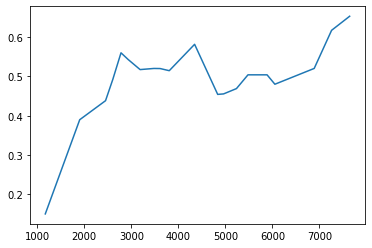

In [98]:
silhouette_indices, silhouette_array = pogo.plot_silhouette_score(20)


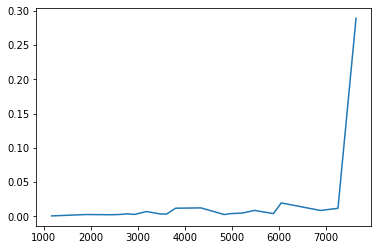

In [99]:
silhouette_gap = np.multiply(silhouette_array,pogo.gap_vector_[silhouette_indices])
plt.plot(silhouette_indices,silhouette_gap)

In [100]:
silhouette_indices[np.argmax(silhouette_gap)]

7643

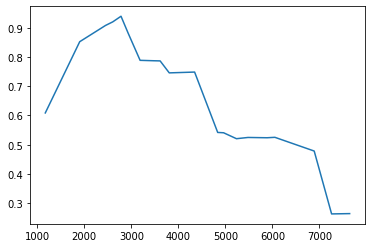

In [101]:
rand_indices, rand_array = pogo.plot_rand_score(20,y)


In [102]:
rand_indices[np.argmax(rand_array)]

2781

In [103]:
X, y, filename = return_dataset('D31.txt')

https://cs.joensuu.fi/sipu/datasets/D31.txt
D31.txt
(3100, 3)
[[25.0514  5.7475  1.    ]
 [26.6614  7.3414  1.    ]
 [25.2653  6.2466  1.    ]
 [25.2285  4.7447  1.    ]
 [25.7529  5.1564  1.    ]
 [24.0785  5.6693  1.    ]
 [25.2722  6.8676  1.    ]
 [24.6535  6.2443  1.    ]
 [26.9834  6.633   1.    ]
 [25.7437  6.3179  1.    ]]
(3100,)
(3100, 2)


In [104]:
pogo = Pogo(overlapping=False)
pogo.fit(X)
pogo.plot()

KeyboardInterrupt: 

In [ ]:
pogo = Pogo(overlapping=True)
pogo.fit(X)
pogo.plot()